In [1]:
import pandas as pd
from total_data_import import import_data
from top50 import top50
import matplotlib.pyplot as plt

# Import the top 50 Raw lifters of all time by weight class and sex
df = top50()

# Create chart of average bodyweight, average total and heaviest total by weight class and sex
# Then calcualte the relative strength and absolute & relative strength percent growth figures
sex_age_comparisons = (
    df.groupby(["weightclass_lbs", "sex"])
        .agg(
            avg_bodyweight_lbs=("bodyweight_lbs", "mean"), 
            avg_total_lbs=("total_lbs", "mean"), 
            heaviest_total=("total_lbs", "mean"), 
            average_age=("age", "mean"), 
            oldest=("age", "max"), 
            youngest=("age", "min")
        )
        .round(2)
)

sex_age_comparisons

avg_bodyweight_lbs  avg_total_lbs  heaviest_total  \
weightclass_lbs    sex                                                      
148                F                147.14        1209.06         1209.06   
                   M                145.88        1538.25         1538.25   
165                F                162.76        1245.77         1245.77   
                   M                168.47        1684.00         1684.00   
181                F                177.31        1238.78         1238.78   
                   M                181.33        1829.99         1829.99   
198                F                193.17        1262.34         1262.34   
                   M                205.67        1951.07         1951.07   
220                F                212.50        1228.12         1228.12   
                   M                221.17        2029.77         2029.77   
242                M                238.68        2091.47         2091.47   
275                M                269.48        2144.32         2144.32   
308                M                296.38        2189.89         2189.89   
Super Heavy Weight F                287.81        1415.11         1415.11   
                   M                356.47        2224.65         2224.65   

                        average_age  oldest  youngest  
weightclass_lbs    sex                                 
148                F          30.20    45.0      20.5  
                   M          27.89    57.0      18.5  
165                F          30.85    47.0      19.5  
                   M          27.77    56.0      18.5  
181                F          31.09    47.0      21.0  
                   M          27.92    37.0      19.5  
198                F          32.05    52.0      21.5  
                   M          27.89    37.0      19.0  
220                F          33.38    55.0      18.5  
                   M          28.52    40.0      21.0  
242                M          28.14    38.0      21.0  
275                M          30.66    44.0      22.0  
308                M          30.46    41.0      21.0  
Super Heavy Weight F          29.24    46.0      15.0  
                   M          30.73    44.0      20.0

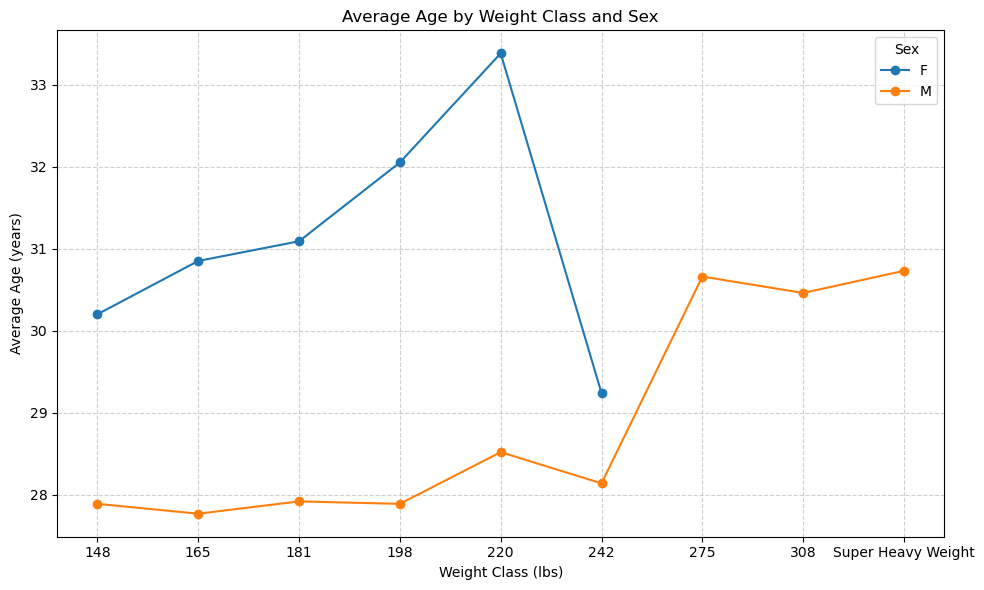

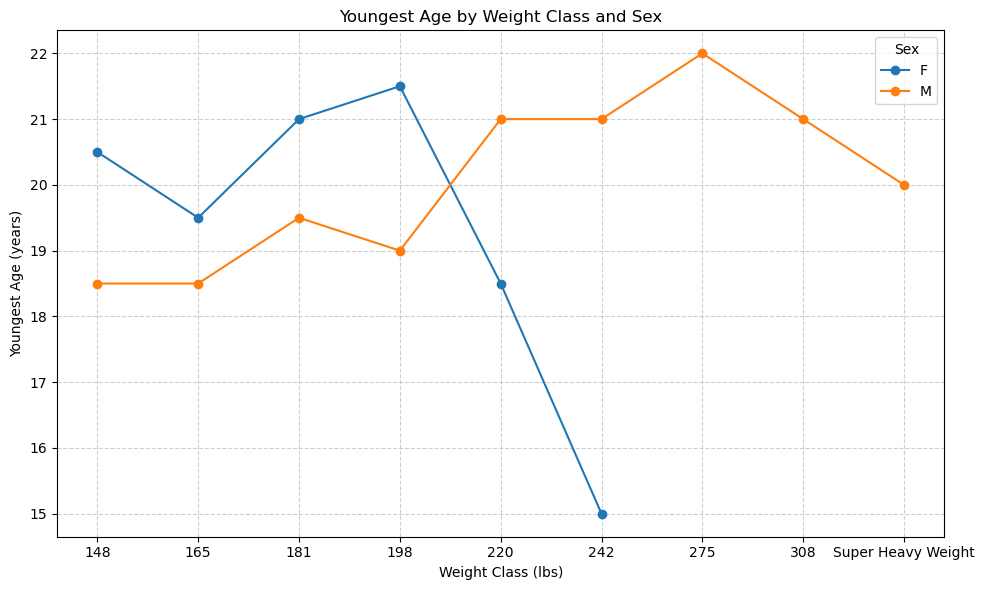

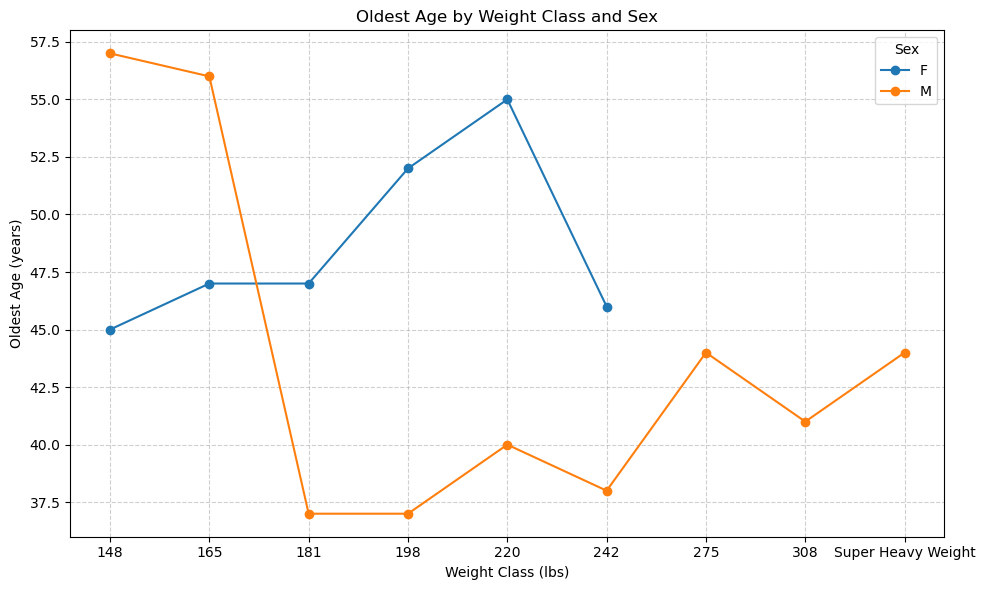

In [2]:
import matplotlib.pyplot as plt

# Reset index for plotting
plot_df = sex_age_comparisons.reset_index()

# Helper: sort weight classes numerically with "Super Heavy Weight" last 
def weightclass_sort_key(wc: str):
    wc = str(wc).strip()
    if wc.lower().startswith("super"):
        return 9999
    try:
        return float(wc.replace("+", "").split()[0])
    except ValueError:
        return 9999

# Sort dataframe by weight class numeric order
plot_df = plot_df.sort_values("weightclass_lbs", key=lambda x: x.map(weightclass_sort_key))

# Build ordered x-axis labels
ordered_labels = sorted(plot_df["weightclass_lbs"].unique(), key=weightclass_sort_key)

# Common plotting style
def plot_age_metric(y_col, title, ylabel):
    plt.figure(figsize=(10,6))
    for sex, data in plot_df.groupby("sex"):
        plt.plot(range(len(data)), data[y_col], marker='o', label=sex)
    plt.xticks(ticks=range(len(ordered_labels)), labels=ordered_labels)
    plt.title(title)
    plt.xlabel("Weight Class (lbs)")
    plt.ylabel(ylabel)
    plt.legend(title="Sex")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Average Age
plot_age_metric(
    y_col="average_age",
    title="Average Age by Weight Class and Sex",
    ylabel="Average Age (years)"
)

# Youngest Age
plot_age_metric(
    y_col="youngest",
    title="Youngest Age by Weight Class and Sex",
    ylabel="Youngest Age (years)"
)

# Oldest Age
plot_age_metric(
    y_col="oldest",
    title="Oldest Age by Weight Class and Sex",
    ylabel="Oldest Age (years)"
)
